# Using Whisper API to transcribe text using your Device Microphone

[`Audio Whisper API`](https://platform.openai.com/docs/guides/speech-to-text) is capable of translating and transcribing - putting speech into written form. It is powered by OpenAI's [`large-v2 Whisper model`](https://github.com/openai/whisper). 

We will record audio from your device's microphone and transcribe the audio using OpenAI's Audio Whisper API. This functionality is similar to clicking on the microphone 🎙️ icon in ChatGPT. Note that speech-to-text is not supported in the [ChatGPT for Web](http://chatgpt.com).

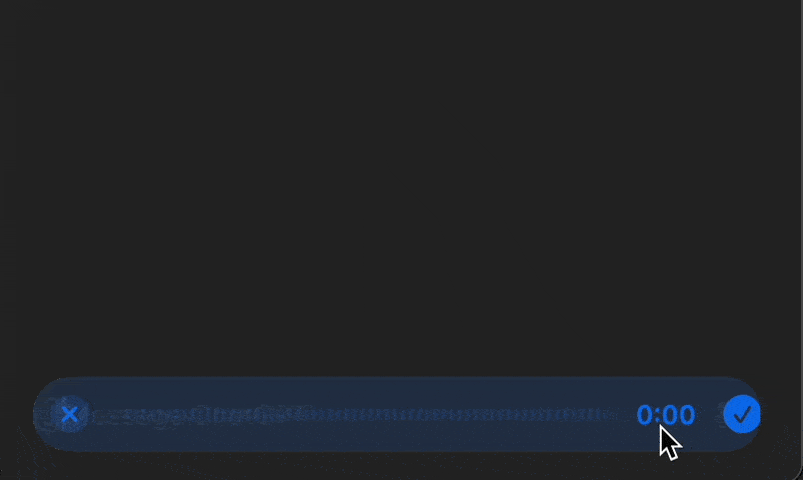

We will be working with WAV files. Though larger than `mp3`, WAV files store audio in an uncompressed format. This means the audio is stored in its purest form without any loss of quality due to compression algorithms. For transcription purposes, high-quality audio can significantly improve speech-to-text accuracy.

We will go through three different code snippets making the main function:
1. **Recording** from your device microphone and storing it into a temporary file
2. **Transcribing** the audio to text using OpenAI's Audio Whisper API
3. **Copying** the transcript to your clipboard for use (prompting, messaging, and etc.)

The entire code snippet will be available at [the end of this article](#main-code-snippet).

## Table of Contents

1. [Introduction](#using-audio-api-to-transcibe-text-from-your-device-microphone)
2. [Microphone Permissions](#microphone-permissions)
   - [For Windows](#for-windows)
   - [For MacOS](#for-macos)
3. [Recording Audio](#recording-from-your-device-microphone)
4. [Transcribing Audio](#transcribing-your-recording)
5. [Copy and Paste Operations](#copying-to-clipboard)
6. [Main function and Demo](#main-code-snippet) 
7. [Troubleshooting](#troubleshooting)
8. [FAQ](#faq)
9. [Conclusion](#conclusion)

## Microphone Permissions

Before we start recording audio, ensure the necessary permissions to access the microphone.

### For Windows

1. Open Settings.
2. Go to Privacy > Microphone.
3. Ensure that "Microphone access for this device" is turned on.
4. Ensure that the app you're using (e.g., your Python IDE) is allowed to access the microphone.

### For MacOS

1. Open System Preferences.
2. Go to Security & Privacy > Privacy.
3. Select Microphone from the left-hand menu.
4. Ensure that the app you're using (e.g., your Python IDE) is checked.

## Setup
We need several libraries to record and process audio. 	
- pyaudio: To capture audio from the microphone.
- wave: To handle .wav files.
- tempfile: To create temporary files for storing recordings.
- simpleaudio: To play back audio (for debugging).

To install prerequisites, simply run the following code snippet.

In [ ]:
# Prerequisites for the Python Modules
!brew install ffmpeg
!brew install portaudio

# Audio Processing
%pip install pyaudio
%pip install wave

# Temp File Processing
%pip install tempfile
%pip install simpleaudio

# Clipboard Management
%pip install pyperclip

%pip install openai

___
# Table of Contents

1. [Introduction](#using-audio-api-to-transcibe-text-from-your-device-microphone)
2. [Microphone Permissions](#microphone-permissions)
   - [For Windows](#for-windows)
   - [For MacOS](#for-macos)
3. [Troubleshooting](#troubleshooting)
   - [Common Issues](#common-issues)
   - [Advanced Troubleshooting](#advanced-troubleshooting)
4. [FAQ](#faq)
5. [Conclusion](#conclusion)

___
### Recording from your Device Microphone

1. **Set Up Temporary File.** We create a temporary file to store the recorded audio. This file will be deleted after use.

In [22]:
import pyaudio
import wave
import tempfile
import simpleaudio as sa

In [23]:
temp_file = tempfile.NamedTemporaryFile(suffix=".wav", delete=False)
temp_file_name = temp_file.name

2. **Callback Function.** This function writes audio data to the temporary file while recording.

In [24]:
def callback(data_input, frame_count, time_info, status):
    wav_file.writeframes(data_input)
    return None, pyaudio.paContinue

3. **Record Audio.** We set up the microphone to capture audio and save it to the temporary file.
- Open a .wav file for writing.
- Set the audio format: 1 channel, 16-bit samples, and 16000 Hz sample rate.
- Initialize PyAudio and start recording.

In [25]:
with wave.open(temp_file_name, 'wb') as wav_file:
    wav_file.setnchannels(1)  # Mono channel
    wav_file.setsampwidth(2)  # 16-bit samples
    wav_file.setframerate(16000)  # 16kHz sample rate

    audio = pyaudio.PyAudio()

    # Start recording
    stream = audio.open(format=pyaudio.paInt16,
                        channels=1,
                        rate=16000,
                        input=True,
                        frames_per_buffer=1024,
                        stream_callback=callback)

    input("Press return (or enter) to stop recording...")

    # Stop Recording
    stream.stop_stream()
    stream.close()
    audio.terminate()

    # Play the audio - debugging purposes
    playback = sa.WaveObject.from_wave_file(temp_file.name)
    play_obj = playback.play()
    play_obj.wait_done()


___

### Transcribing your Recording 

1. **Import OpenAI Library**. We use the OpenAI library to access the Audio Whisper API.

To use the OpenAI API, you need to set up your API key. You can obtain your API key from the [OpenAI website](https://platform.openai.com/account/api-keys). 

#### ❗Important 
Jupyter Notebooks don’t allow for .env files to automatically load environment variables. Therefore, please run the cell with your API key and then delete the line containing the key for security purposes. The notebook will remember the key for the current session. You will have to re-enter the API key each time you restart the environment.


Once you have your key, you can set it up in your code as follows:

In [26]:
import openai

# Set up your OpenAI API key
openai.api_key = ""

2. **Transcribe Audio.** Open the recorded audio file and send it to the OpenAI Audio Whisper API for transcription. The API returns the text.

*Note:* You can use `prompt` to *guide* the transcription as you record. This is useful for various reasons, such as spelling correction, language specification, acronym recognition, filler word removal or inclusion, punctuation, and more.

View [Audio Whisper API's reference](https://platform.openai.com/docs/guides/speech-to-text/prompting) for more information. Alternatively, you can also look at prestontuggle's [AI Cookbook Recipe](https://cookbook.openai.com/examples/whisper_prompting_guide).

In [27]:
with open(temp_file_name, 'rb') as audio_file:
    response = openai.Audio.transcribe(
        file=audio_file,
        model="whisper-1",
        prompt=""
    )
    transcription = response['text'].strip()

___
### Copying to Clipboard
1. **Import pyperclip.** This library helps copy text to the clipboard.

In [ ]:
import pyperclip

2. **Copy Transcription.** Copy the transcribed text to the clipboard and print a confirmation message.

In [29]:
pyperclip.copy(transcription)
print("Transcription copied to clipboard!")

Transcription copied to clipboard!


### Main Code Snippet
Here’s the complete function that records audio, transcribes it, and copies the resulting text to the clipboard.

In [31]:
import simpleaudio as sa
import openai
import pyaudio
import wave
import tempfile
import os
import pyperclip

def transcribe_audio(debug=False, prompt="") -> str:
    """
    Records audio directly from the microphone and transcribes it to text using OpenAI's API.

    Args:
        debug (bool): If True, plays back the recorded audio for verification.

    Returns:
        str: The transcription of the recorded audio.
    """
    # Create a temporary file to store the recorded audio
    temp_file = tempfile.NamedTemporaryFile(suffix=".wav", delete=False)
    temp_file_name = temp_file.name

    def callback(data_input, frame_count, time_info, status):
        """
        Callback function to write audio data to the temporary file.

        Args:
            data_input (bytes): The recorded audio data.
            frame_count (int): The number of frames.
            time_info (dict): Dictionary containing timing information.
            status (int): Status flag.

        Returns:
            tuple: None and continue flag.
        """
        wav_file.writeframes(data_input)
        return None, pyaudio.paContinue

    # Open the wave file for writing
    with wave.open(temp_file_name, 'wb') as wav_file:
        # Set the audio parameters: mono channel, 16-bit samples, 16kHz sample rate
        wav_file.setnchannels(1)
        wav_file.setsampwidth(2)  # 16 bits per sample divided by 8
        wav_file.setframerate(16000)

        # Initialize PyAudio and start recording audio
        audio = pyaudio.PyAudio()
        stream = audio.open(format=pyaudio.paInt16,
                            channels=1,
                            rate=16000,
                            input=True,
                            frames_per_buffer=1024,
                            stream_callback=callback)

        input("Press Enter to stop recording...")

        # Stop and close the audio stream
        stream.stop_stream()
        stream.close()
        audio.terminate()

    # Play the recorded audio for debugging purposes
    if debug:
        playback = sa.WaveObject.from_wave_file(temp_file.name)
        play_obj = playback.play()
        play_obj.wait_done()  # Wait until playback is finished

    # Transcribe the audio to text using OpenAI's API
    with open(temp_file_name, 'rb') as audio_file:
        response = openai.Audio.transcribe(
            file=audio_file,
            model="whisper-1",
            prompt=prompt
        )
        transcription = response['text'].strip()

    # Delete the temporary audio file
    os.remove(temp_file_name)

    # Copy the transcription to the clipboard
    pyperclip.copy(transcription)

    return transcription

In [32]:
# Demo: Transcribe spoken English with proper grammar and punctuation
transcribe_audio(debug=True, prompt="English spoken. Proper grammar and punctuation. Skip fillers.")

'Hey, thanks for finishing this tutorial. I hope you have a good one and you find this useful.'

## Troubleshooting

### Common Issues

1. **Microphone not working**:
   - Ensure that your microphone is properly connected and recognized by your device.
   - Check that the microphone is not muted and that the volume is turned up.
   - Verify that your application has permission to access the microphone (see [Microphone Permissions](#microphone-permissions)).

2. **Audio quality issues**:
   - Ensure you are in a quiet environment to reduce background noise.
   - Adjust the microphone sensitivity settings if needed.

3. **Transcription errors**:
   - Ensure that the audio file is clear and that the speaker’s voice is distinct.
   - Try re-recording the audio if the transcription is not accurate.

### Advanced Troubleshooting

1. **Debugging audio playback**:
   - Enable the `debug` parameter in the `transcribe_audio` function to listen to the recorded audio for quality verification.

2. **Handling large audio files**:
   - For longer recordings, consider splitting the audio into smaller chunks before transcription to improve accuracy and performance.

## FAQ
See Whisper Audio Whisper API's official FAQs [here](https://help.openai.com/en/articles/7031512-whisper-audio-api-faq).

**Q: How can I improve the transcription accuracy?**

- Ensure the recording environment is quiet and free from background noise.
- Speak clearly and at a moderate pace.
- Use a high-quality microphone if possible.

**Q: Can I use this method to transcribe audio in other languages?**

- Yes, OpenAI’s Whisper model supports [multiple languages](https://platform.openai.com/docs/guides/speech-to-text/supported-languages%5C). You can specify the language in the API request for better results.

## Conclusion

Congratulations! You have successfully learned how to record audio from your device’s microphone, transcribe it using OpenAI’s Audio Whisper API, and copy the transcribed text to your clipboard. Feel free to explore further with the [API reference](https://platform.openai.com/docs/api-reference/audio) and modify the code to suit your needs.